In [561]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout,BatchNormalization,MaxPool2D
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:
img_path = '/kaggle/input/dataset/ECG Images of COVID-19 Patients (250)/Binder1_Page_001.jpg'

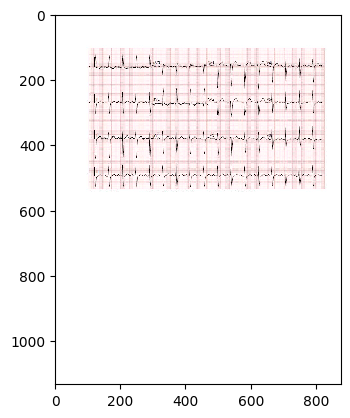

In [5]:
from tensorflow.keras.preprocessing import image
img = image.load_img(img_path)
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
import keras.utils as image
import PIL.Image as Image
image_path = '/kaggle/input/dataset/ECG Images of COVID-19 Patients (250)/Binder1_Page_001.jpg'

test_img = tf.keras.utils.load_img(image_path, target_size = (64, 64))


In [544]:
# import cv2
# img = cv2.imread(img_path)
# crop_img = img[ img.shape[0] - 1273 : -80,
#                 img.shape[1] - 2131 : 2074+75 ]



# plt.imshow(crop_img,interpolation='nearest')
# plt.show()

In [545]:
X = []
Y = []
image_size = 128

In [546]:
ecg_path = '/kaggle/input/dataset'

In [547]:
labels = os.listdir(ecg_path)
labels

['Normal Person ECG Images (859)',
 'ECG Images of Myocardial Infarction Patients (77)',
 'ECG Images of Patient that have abnormal heart beats (548)',
 'ECG Images of COVID-19 Patients (250)',
 'ECG Images of Patient that have History of MI (203)']

In [548]:
# covid_path='/kaggle/input/dataset/ECG Images of COVID-19 Patients (250)'

In [549]:
for i in labels:
#     if(i == 'ECG Images of COVID-19 Patients (250)'):
#         continue
        
    targetPath = os.path.join(ecg_path,i)
    for j in os.listdir(targetPath):
        img = cv2.imread(os.path.join(targetPath,j))

#         if(i != covid_path):
#             img = img[ img.shape[0] - 1273 : -80,
#                         img.shape[1] - 2131 : 2074+75 ]
        
        img = cv2.resize(img,(image_size,image_size))
        X.append(img)
        Y.append(i)    
       

In [550]:
X = np.array(X)
Y = np.array(Y)  

In [551]:
pd.DataFrame(Y).value_counts()

Normal Person ECG Images (859)                                859
ECG Images of Patient that have abnormal heart beats (548)    546
ECG Images of COVID-19 Patients (250)                         250
ECG Images of Patient that have History of MI (203)           203
ECG Images of Myocardial Infarction Patients (77)              74
dtype: int64

In [552]:
X,Y = shuffle(X,Y,random_state=101)

In [553]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [554]:
# for i in y_train:
#    print(i)

In [555]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new

In [556]:
# Encoding
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [557]:
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

(1545, 128, 128, 3)
(1545, 5)

(387, 128, 128, 3)
(387, 5)


In [558]:
num_classes = 5

In [559]:
# model = Sequential()

# model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(image_size,image_size,3)))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))

# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Dropout(0.3))
# model.add(MaxPooling2D(2,2))

# model.add(Dropout(0.3))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))

# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))

# model.add(Flatten())

# model.add(Dense(512,activation = 'relu'))
# model.add(Dense(512,activation = 'relu'))
# model.add(Dropout(0.3))

# model.add(Dense(5,activation='softmax'))




model = Sequential([layers.experimental.preprocessing.Rescaling \
                    (1.0/255,input_shape=(image_size,image_size,3))])

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.15))

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.20))

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))

In [1]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
epochs=15
history = model.fit(X_train,y_train,epochs=epochs,validation_split=0.1)

In [ ]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

In [ ]:
# draw vertical lines function
def vert_lines(paramx):
    # this for loop to draw vertical lines for each epoch
    for i in epochs:
        plt.axvline(
            x = i, 
            ymin = 0, 
            ymax = 1,
            linestyle = ':',
            alpha=0.2,
            color = 'black',)
    
    # to show all max depth in x-axis
    plt.xticks(np.arange(min(epochs), max(epochs)+1, 1))

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")

# draw vertical lines function
vert_lines(epochs)

plt.legend(loc='upper left')
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")

# draw vertical lines function
vert_lines(epochs)

plt.legend(loc='upper left')
plt.show()



In [ ]:
import PIL.Image as Image
image_path = '/kaggle/input/dataset/ECG Images of COVID-19 Patients (250)/Binder1_Page_009.jpg'

IMAGE_SHAPE = (image_size, image_size)
image = Image.open(image_path).resize(IMAGE_SHAPE)
image

In [ ]:
image = np.array(image)/255.0
print(image.shape)
print()


result = model.predict(image[np.newaxis, ...])
print(result)
print()



print(np.argmax(result))
# [[0.16496065 0.20349425 0.14675413 0.30881017 0.17598085]]

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 

In [ ]:
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

In [ ]:
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))